# WOC 4.0
>> ### Machine Learning
>>>> ###### IIT(ISM) Dhanabad
>>>> ###### Arushika

## Polynomial regression

>> ### Training set

In [1]:
# Importing libraries needed for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

In [2]:
# Loading dataset 
data = pd.read_csv('Polynomial_train.csv')
data

,Unnamed: 0,X,Y,Z,label
0,0,0.643715,-9.866550,-5.836019,307.972927
1,1,-1.366446,-3.761945,-8.756162,136.398375
2,2,-4.090270,-1.836218,-1.846066,-310.724813
3,3,-8.730478,-1.923651,3.892972,1.755447
4,4,5.367169,0.358357,6.703989,-343.582590
...,...,...,...,...,...
49995,49995,2.693877,-1.362685,-7.392968,683.405727
49996,49996,-9.270188,-5.456920,-2.343480,-1874.385403
49997,49997,6.616753,-2.847288,-0.504040,663.873655
49998,49998,3.558199,4.507526,-4.823674,-421.004005


The Algorithm
* Modify the hypothesis function of Linear Regression according to the data you have.
* Add new higher (whichever) degree features you want to the input.
* Do the Gradient Descent/mini-batch Gradient Descent to the modified input to find the parameters — weights and bias.


In [3]:
data = (data - data.mean())/data.std()

In [4]:
# Seperating the x and y matrices

# Like in the training set
# X-matrice is supposed to be a m x (n+1) dimensional matrice
# where n = Number of different features present 
#       m = Number of enteries in each feature
x= data.iloc[:,1:2].values # for m x 1 dimensional 

# y-matrice is supposed to be a m x 1 dimensional matrice 
Y = data.iloc[:,2:3].values

# z-matrice is supposed to be a m x 1 dimensional matrice
Z = data.iloc[:,3:4].values

features = data.iloc[:,1:4].values

# Label matrices is supposed to a m x 1 dimensional matrice
Label_1 = data.iloc[:,4:5].values

` Hypothesis function` for polynomial regression will seem like this:

<b> h_theta (x,y,z) = theta_0 + theta_1 * x + theta_2 * y + theta_3 * z + theta_4 * x^2 + theta_5 * y^2 + theta_6 * z^2 + theta_7 * xy + theta_8 * yz + theta_9 * zx + theta_10 * x^3 + theta_11 * y^3 + theta_12 * z^3 + theta_13 * x^2(y) + theta_14 * x^2(z) + theta_15 * y^2(z) + theta_16 * y^2(x) + theta_17 * z^2(x) + theta_18 * z^2(y)+ theta_19 * xyz

In [5]:
# Here we will construct the features matrix(X_5). 
# First we will create the individual columns and then append them together.

# x_0 for simplicity is considered to be 1 matrices.
ones = np.ones([x.shape[0],1]) #Dimension is m x 1
x_0 = ones

# x_1 is simply the x feature given in the dataset
x_1 = x

# x_2 is simply the y feature given in the dataset
x_2 = Y

# x_3 is simply the z feature given in the dataset
x_3 = Z

# x_4 is square of the x feature given in the dataset
x_4 = x**2

# x_5 is square of the y feature given in the dataset 
x_5 = Y**2

# x_6 is square of the z feature given in the dataset 
x_6 = Z**2

# x_7 is the multiplycation of x and y matrice 
x_7 = x*(Y)

# x_8 is the multiplication of y and z matrice 
x_8 = Y*(Z)

# x_9 is the multiplication of z and x matrice
x_9 = Z*(x)

# x_10 is the cube of the x feature given in the dataset
x_10 = x**3

# x_11 is the cube of the y feature given in the dataset
x_11 = Y**3

# x_12 is the cube of the z feature given in the dataset
x_12 = Z**3

# x_13 is the multiplication of square of x and y matrice
x_13 = (x**2)*Y

# x_14 is the multiplication of square of x and z matrice
x_14 = (x**2)*Z

# x_15 is the multplication of square of y and x matrice
x_15 = (Y**2)*x

# x_16 is the multiplication of square of y and z matrice
x_16 = (Y**2)*Z

# x_17 is the multiplication of square of z and x matrice
x_17 = (Z**2)*x

# x_18 is the multiplication of square of z and y matrice 
x_18 = (Z**2)*Y

# x_19 is the multiplcation of all three features givven in the dataset x,y and z
x_19 = (x*Y)*Z

In [6]:
# Appending the featueres together
X1 = np.concatenate((x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19),axis=1)
X1 = np.asarray(X1)
print(X1)

[[ 1.          0.1057533  -1.69738613 ...  0.10797556 -1.73305432
   0.1813804 ]
 [ 1.         -0.2427338  -0.64326391 ... -0.55714537 -1.47647961
  -0.23655851]
 [ 1.         -0.71494348 -0.31073582 ... -0.07368195 -0.03202438
  -0.07131941]
 ...
 [ 1.          1.1412558  -0.48532404 ...  0.00906858 -0.00385646
   0.0493734 ]
 [ 1.          0.61101634  0.78468006 ...  0.42655612  0.54779235
  -0.40059647]
 [ 1.          0.10223675  1.53680881 ...  0.03210022  0.48252616
  -0.08803946]]


In [7]:
X1.shape

(50000, 20)

In [8]:
# Matrice of theta(coefficient of the features in hypothesis function) is supposed to a 1 x (n+1) dimensional matrice
theta = np.zeros([1,20])

In [91]:
#@title Setting Hyperparameters
Alpha = 0.0015 #@param {type:"slider", min:0, max:1, step:0.01}
iters = 1200 #@param {type:"slider", min:100, max:3000, step:100}
alpha_3 = Alpha
iters_3 = iters

In [92]:
#Defining Cost function
def computeCost(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))

In [93]:
#Defining gradient descent
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = computeCost(X, y, theta)
    
    return theta,cost

In [94]:
#running the gd and cost function
g,cost = gradientDescent(X1,Label_1,theta,iters_3,alpha_3)
print(g)

finalCost = computeCost(X1,Label_1,g)
print(finalCost)

[[-5.10909647e-03  2.03975302e-03 -1.24836278e-03 -3.03204123e-03
   2.15717463e-02 -1.06865962e-01  8.28434608e-02 -7.38995076e-01
   1.64933847e-01 -3.24882778e-01  3.73292220e-03 -1.66596609e-03
  -6.90895252e-04  1.88343047e-03  5.34941106e-04 -1.93441179e-03
   2.01254239e-03 -7.63185624e-04  1.14422015e-04 -7.65883200e-04]]
0.014045599419497666


Text(0.5, 1.0, 'Error vs. Training Epoch')

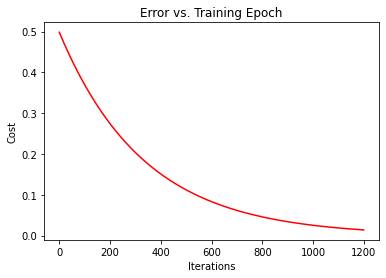

In [95]:
#plot the cost
fig, ax = pp.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')

### Test Set

In [96]:
data_ = pd.read_csv('Polynomial_test.csv')
data_

,Unnamed: 0,X,Y,Z,label
0,0,9.322078,0.413096,5.984731,-657.669309
1,1,2.811964,6.142752,6.419237,-545.362524
2,2,-2.669784,7.775091,-6.931907,-75.044187
3,3,-6.992156,-9.205548,0.852580,-2403.124902
4,4,1.574294,-2.213266,6.029188,8.595325
...,...,...,...,...,...
9995,9995,-0.992449,-7.853677,7.748156,-635.006038
9996,9996,8.574451,6.271919,-5.734962,-1275.855209
9997,9997,6.640997,6.864877,4.511685,-1771.640694
9998,9998,-6.262414,1.323203,-3.917748,-22.746921


Normalizing the dataset 

In [97]:
data_ = (data_ - data_.mean()) / data_.std()
data_

,Unnamed: 0,X,Y,Z,label
0,-1.731791,1.602895,0.057199,1.034578,-0.563902
1,-1.731445,0.474656,1.049657,1.109700,-0.470760
2,-1.731098,-0.475360,1.332401,-1.198596,-0.080700
3,-1.730752,-1.224451,-1.608887,0.147274,-2.011504
4,-1.730405,0.260161,-0.397724,1.042264,-0.011333
...,...,...,...,...,...
9995,1.730405,-0.184669,-1.374724,1.339458,-0.545107
9996,1.730752,1.473327,1.072031,-0.991655,-1.076598
9997,1.731098,1.138249,1.174739,0.779901,-1.487780
9998,1.731445,-1.097983,0.214842,-0.677474,-0.037327


In [98]:
# Seperating the columns provided in the dataset.

# Like in the training set
# X-matrice is supposed to be a m x (n+1) dimensional matrice
# where n = Number of different features present 
#       m = Number of enteries in each feature
x_test= data_.iloc[:,1:2] # for m x 1 dimensional 

# y-matrice is supposed to be a m x 1 dimensional matrice 
Y_test = data_.iloc[:,2:3].values

# z-matrice is supposed to be a m x 1 dimensional matrice
Z_test = data_.iloc[:,3:4].values
 
# Label matrices is supposed to a m x 1 dimensional matrice
Label_2 = data_.iloc[:,4:5].values

In [99]:
# Here we will construct the features matrix(X_6). 
# First we will create the individual columns and then append them together.

# x_0 for simplicity is considered to be 1 matrices.
ones = np.ones([x_test.shape[0],1]) #Dimension is m x 1
x_0 = ones

# x_1 is simply the x feature given in the dataset
x_1 = x_test

# x_2 is simply the y feature given in the dataset
x_2 = Y_test

# x_3 is simply the z feature given in the dataset
x_3 = Z_test

# x_4 is square of the x feature given in the dataset
x_4 = x_test**2

# x_5 is square of the y feature given in the dataset 
x_5 = Y_test**2

# x_6 is square of the z feature given in the dataset 
x_6 = Z_test**2

# x_7 is the multiplycation of x and y matrice 
x_7 = x_test*(Y_test)

# x_8 is the multiplication of y and z matrice 
x_8 = Y_test*(Z_test)

# x_9 is the multiplication of z and x matrice
x_9 = Z_test*(x_test)

# x_10 is the cube of the x feature given in the dataset
x_10 = x_test**3

# x_11 is the cube of the y feature given in the dataset
x_11 = Y_test**3

# x_12 is the cube of the z feature given in the dataset
x_12 = Z_test**3

# x_13 is the multiplication of square of x and y matrice
x_13 = (x_test**2)*Y_test

# x_14 is the multiplication of square of x and z matrice
x_14 = (x_test**2)*Z_test

# x_15 is the multplication of square of y and x matrice
x_15 = (Y_test**2)*x_test

# x_16 is the multiplication of square of y and z matrice
x_16 = (Y_test**2)*Z_test

# x_17 is the multiplication of square of z and x matrice
x_17 = (Z_test**2)*x_test

# x_18 is the multiplication of square of z and y matrice 
x_18 = (Z_test**2)*Y_test

# x_19 is the multiplcation of all three features givven in the dataset x,y and z
x_19 = (x_test*Y_test)*Z_test

In [100]:
X_1= np.concatenate((x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19),axis=1)
X_1 = np.asarray(X_1)
print(X_1)

[[ 1.          1.6028949   0.05719898 ...  1.71565996  0.06122298
   0.09485416]
 [ 1.          0.47465649  1.04965702 ...  0.58450814  1.29258334
   0.55288195]
 [ 1.         -0.4753605   1.33240142 ... -0.68291824  1.91417091
   0.75915593]
 ...
 [ 1.          1.13824884  1.17473941 ...  0.69233481  0.71453003
   1.04284132]
 [ 1.         -1.09798296  0.21484245 ... -0.50394282  0.09860655
   0.15981168]
 [ 1.          1.42399409 -0.07871134 ...  0.18740637 -0.0103589
  -0.04066152]]


In [101]:
# Y values (or Labels) can be found by multiplying the arrays of x and theta which is g(gradient)
y_2 = X_1.dot(g.T)
print(y_2) 

[[-0.44312715]
 [-0.36804302]
 [-0.05560715]
 ...
 [-1.19743177]
 [-0.04219779]
 [-0.0282203 ]]


In [102]:
print(Label_2)

[[-0.56390249]
 [-0.47076032]
 [-0.08069956]
 ...
 [-1.48777998]
 [-0.03732658]
 [-0.07224782]]


In [103]:
#combined rmse value
rss=((Label_2-y_2)**2).sum()
mse=np.mean((Label_2-y_2)**2)
print("Final rmse value is =",np.sqrt(np.mean((Label_2-y_2)**2)))

Final rmse value is = 0.16691423439082115


# Plotting (Polynomial Regression)
Plotting traing dataset and test dataset together

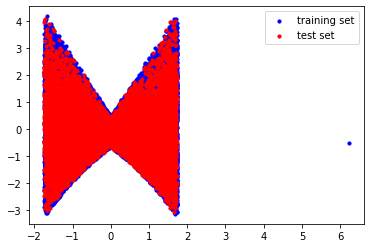

In [77]:
fig = pp.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x, Label_1, s = 10, c = 'b', label = 'training set')
ax1.scatter(x_test, Label_2, s = 10, c = 'r', label = 'test set')
pp.legend(loc='upper right');
pp.show()